In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,kmeans_plusplus
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [53]:
data=pd.read_csv("/content/Wholesale customers data.csv")

In [54]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [56]:
data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [57]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [58]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [59]:
data['Channel'].unique()

array([2, 1])

In [60]:
data['Region'].unique()

array([3, 1, 2])

In [61]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

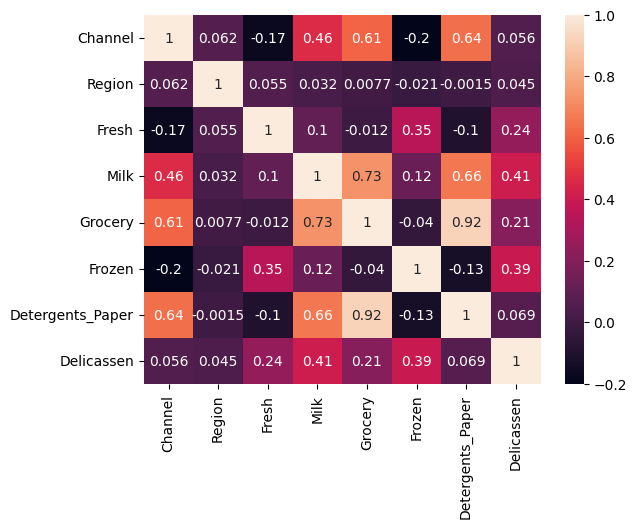

In [62]:
sns.heatmap(data.corr(),annot=True)

In [63]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [64]:
x=data[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [65]:
x

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [66]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,n_init=10)
  model.fit(x)
  wcss.append(model.inertia_)

In [67]:
wcss

[157595857428.7886,
 113217528783.50444,
 80334285778.43172,
 64855545791.26607,
 53013746556.27835,
 47282408405.41869,
 41635284323.50804,
 37705143159.67253,
 33477371722.27941,
 30014408222.545284]

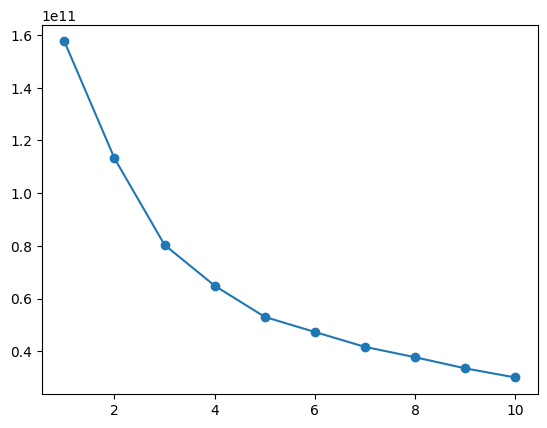

In [68]:
plt.plot(range(1,11),wcss,marker="o")

In [69]:
model=KMeans(n_clusters=5,n_init=10)
model.fit(x)

KMeans(n_clusters=5, n_init=10)

In [70]:
cluster=model.predict(x)

In [71]:
cluster

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 4, 0, 3, 3, 3, 0, 4, 0, 3, 0, 3, 0,
       3, 4, 3, 3, 0, 0, 4, 3, 3, 0, 3, 3, 0, 0, 3, 4, 4, 1, 3, 3, 4, 4,
       0, 4, 4, 2, 0, 4, 0, 0, 3, 4, 3, 0, 4, 4, 0, 0, 0, 2, 0, 4, 0, 2,
       0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 4, 0, 0, 0, 4, 0, 3, 0, 2, 2, 1,
       0, 3, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 1, 0, 3, 4, 4, 0, 4,
       0, 4, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 1, 3, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 4, 0, 0, 0, 3, 3, 0, 3, 0,
       0, 4, 4, 3, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       1, 0, 0, 0, 0, 1, 4, 1, 0, 0, 0, 0, 4, 4, 3, 0, 0, 4, 0, 3, 3, 0,
       0, 0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 3, 2, 0, 0, 4, 4, 4, 3, 4, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 1, 3, 3,
       3, 0, 0, 4, 0, 0, 3, 0, 0, 4, 0, 3, 0, 3, 0, 0, 1, 1, 0, 0, 3, 0,
       4, 4, 4, 3, 4, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 1, 3, 1, 3,
       0, 3, 3, 3, 0, 0, 0, 4, 3, 0, 3, 0, 0, 0, 3,

In [72]:
pd.Series(cluster).value_counts()

,count
0,233
3,106
4,81
1,13
2,7


In [73]:
data['cluster_label']=cluster

In [74]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_label
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,3
436,1,3,39228,1431,764,4510,93,2346,3
437,2,3,14531,15488,30243,437,14841,1867,4
438,1,3,10290,1981,2232,1038,168,2125,0


In [75]:
colors=['r','g','b','y','c']

In [76]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'cluster_label'],
      dtype='object')

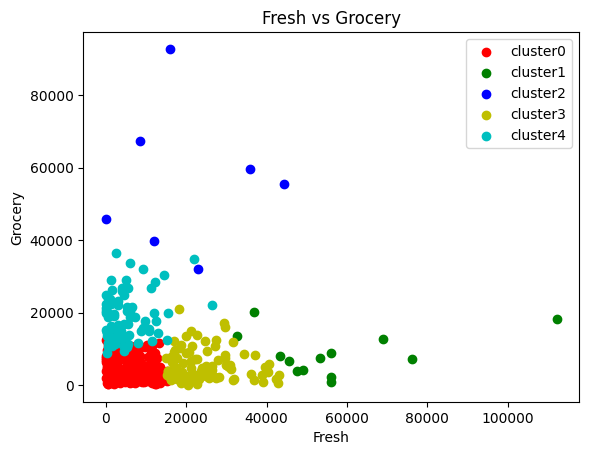

In [77]:
for i in range(max(cluster)+1):
  cluster_data=x[cluster==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Grocery'],
              c=colors[i],
              label=f'cluster{i}')
  plt.legend()
  plt.xlabel("Fresh")
  plt.ylabel("Grocery")
  plt.title("Fresh vs Grocery")


In [78]:
score_kmeans=silhouette_score(x,cluster)
print(f"The silhouette score of this model is {score_kmeans}")

The silhouette score of this model is 0.3832957497925441


In [79]:
x

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [82]:
wcss1=[]
for i in range(2,11):
  model=KMeans(n_clusters=i,init='k-means++')
  model.fit(x)
  wcss1.append(model.inertia_)

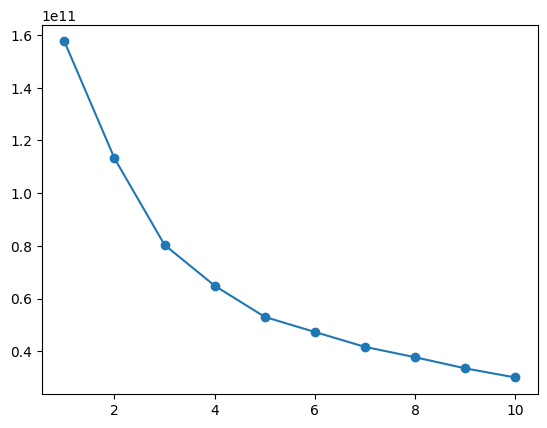

In [83]:
plt.plot(range(1,11),wcss,marker="o")

In [89]:
model1=KMeans(n_clusters=4,init='k-means++')
model1.fit(x)

KMeans(n_clusters=4)

In [90]:
cluster1=model1.predict(x)
cluster1

array([0, 3, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0, 2, 3, 2, 0, 3, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 3, 2, 3, 3, 2, 2, 0, 3, 3,
       0, 3, 3, 1, 0, 3, 0, 0, 2, 3, 2, 0, 3, 3, 0, 0, 0, 1, 0, 3, 0, 1,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 1, 1, 2,
       0, 2, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 3, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       2, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 2, 3,
       0, 0, 3, 3, 2, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 0, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,

In [91]:
pd.Series(cluster1).value_counts()

,count
0,276
3,95
2,58
1,11


In [92]:
data['cluster_label1']=cluster1

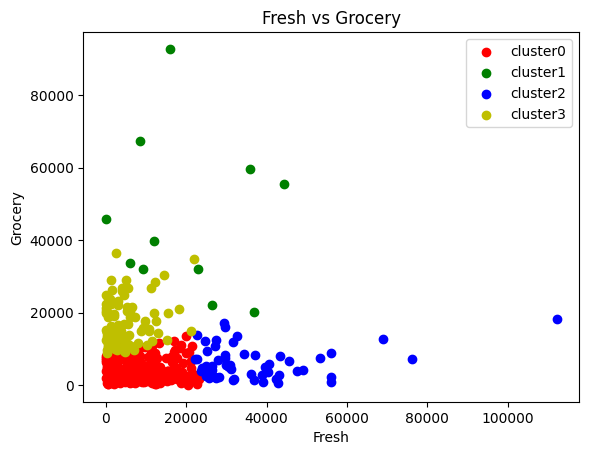

In [93]:
for i in range(max(cluster1)+1):
  cluster_data=x[cluster1==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Grocery'],
              c=colors[i],
              label=f'cluster{i}')
  plt.legend()
  plt.xlabel("Fresh")
  plt.ylabel("Grocery")
  plt.title("Fresh vs Grocery")

In [94]:
model.cluster_centers_

array([[2.59322034e+00, 3.61563898e+04, 6.12364407e+03, 6.36677966e+03,
        6.81111864e+03, 1.05001695e+03, 3.09005085e+03],
       [2.54285714e+00, 9.02837500e+03, 3.08632143e+03, 3.84064643e+03,
        2.79218929e+03, 1.04494286e+03, 1.05479643e+03],
       [2.57142857e+00, 2.00312857e+04, 3.80840000e+04, 5.61261429e+04,
        2.56457143e+03, 2.76445714e+04, 2.54814286e+03],
       [2.51063830e+00, 5.09297872e+03, 1.12585532e+04, 1.76027447e+04,
        1.59605319e+03, 7.65755319e+03, 1.86648936e+03]])

In [108]:
score_kmeans_plus=silhouette_score(x,cluster1)
print(f"The silhouette score of this model is {score_kmeans_plus}")

The silhouette score of this model is 0.3866313676375216


In [97]:
x.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


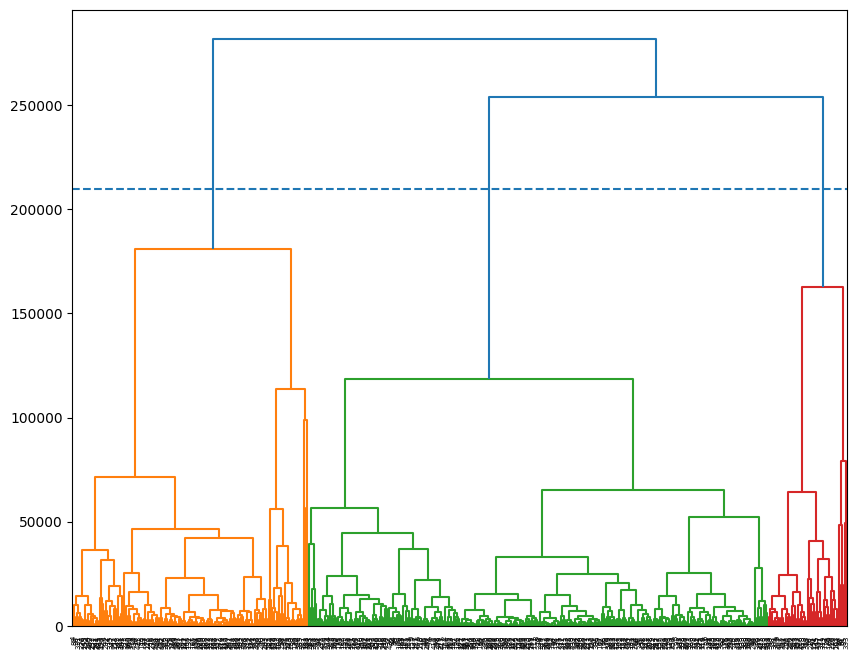

In [99]:
merge=linkage(x,method='ward')
plt.figure(figsize=(10,8))
plt.axhline(210000,linestyle="--")
dendrogram(merge)
plt.show()

In [101]:
cluster2=fcluster(merge,t=210000,criterion='distance')

In [102]:
cluster2

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 2, 2, 3,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 1,
       2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 3, 2, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2,
       2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,

In [103]:
colors=['r','g','b']


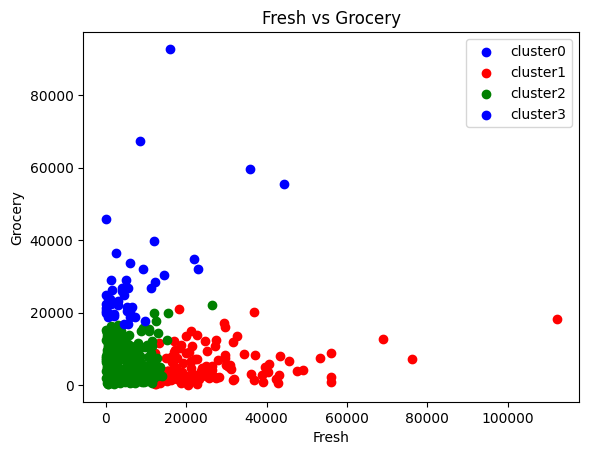

In [105]:
for i in range(max(cluster2)+1):
  cluster_data=x[cluster2==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Grocery'],
              c=colors[i-1],
              label=f'cluster{i}')
  plt.legend()
  plt.xlabel("Fresh")
  plt.ylabel("Grocery")
  plt.title("Fresh vs Grocery")

In [107]:
HC=silhouette_score(x,cluster2)
print(f"The silhouette score of this model is {HC}")

The silhouette score of this model is 0.37501551937192906


In [110]:
print(f"The score of the Kmeans{score_kmeans}")
print(f"The score of the Kmeans{score_kmeans_plus}")
print(f"The score of the Kmeans{HC}")

The score of the Kmeans0.3866313676375216
The score of the Kmeans0.3866313676375216
The score of the Kmeans0.37501551937192906


### The optimal number of clusters is likely to be either 4 or 5